In [2]:
# Importing packages
import pandas as pd
import os
import hvplot.pandas
from pathlib import Path
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing



In [17]:
# Setting up min max scaler

def minMaxScale(df):
    columns = ['Avg Mat Stock Vol', 'Avg Mat Stock High', 'Avg Mat Stock Low']
    min_max_scaler = preprocessing.MinMaxScaler()
    normDf = df.copy()
    normDf[columns] = pd.DataFrame(min_max_scaler.fit_transform(normDf[columns]))
    return normDf

def readStock(filename):
    mat_sc = "mat_scaled.csv"
    df = pd.read_csv(mat_sc).dropna()
    df['date'] = pd.to_datetime(df['date'])
    df1 = df[['date','Avg Mat Stock Vol', 'Avg Mat Stock High', 'Avg Mat Stock Low']]
    
    return minMaxScale(df1)


In [18]:
# Importing my csv with scaled and averaged data

mat_df = readStock("mat_scaled.csv")

mat_df

,date,Avg Mat Stock Vol,Avg Mat Stock High,Avg Mat Stock Low
0,2013-01-18,0.495193,0.082522,0.102095
1,2013-01-22,0.574008,0.088823,0.107708
2,2013-01-23,0.800913,0.089944,0.110972
3,2013-01-24,0.717019,0.088730,0.108875
4,2013-01-25,0.717613,0.087002,0.107212
...,...,...,...,...
2511,2023-01-10,0.278337,0.749402,0.764601
2512,2023-01-11,0.279547,0.778472,0.794542
2513,2023-01-12,0.227354,0.791187,0.802793
2514,2023-01-13,0.221975,0.790263,0.807463


In [ ]:
Ploting Volume vs Date

In [29]:
# Changing names of columns and grouping by date

mat_df = mat_df.rename(columns = {'date':'Date','Avg Mat Stock Vol':'Volume','Avg Mat Stock High':'High', 'Avg Mat Stock Low':'Low'})

mat_df = mat_df.groupby('Date')[['High','Low','Volume']].mean().dropna()

mat_df


,High,Low,Volume
Date,,,
2013-01-18,0.082522,0.102095,0.495193
2013-01-22,0.088823,0.107708,0.574008
2013-01-23,0.089944,0.110972,0.800913
2013-01-24,0.088730,0.108875,0.717019
2013-01-25,0.087002,0.107212,0.717613
...,...,...,...
2023-01-10,0.749402,0.764601,0.278337
2023-01-11,0.778472,0.794542,0.279547
2023-01-12,0.791187,0.802793,0.227354


(0.0, 0.7)

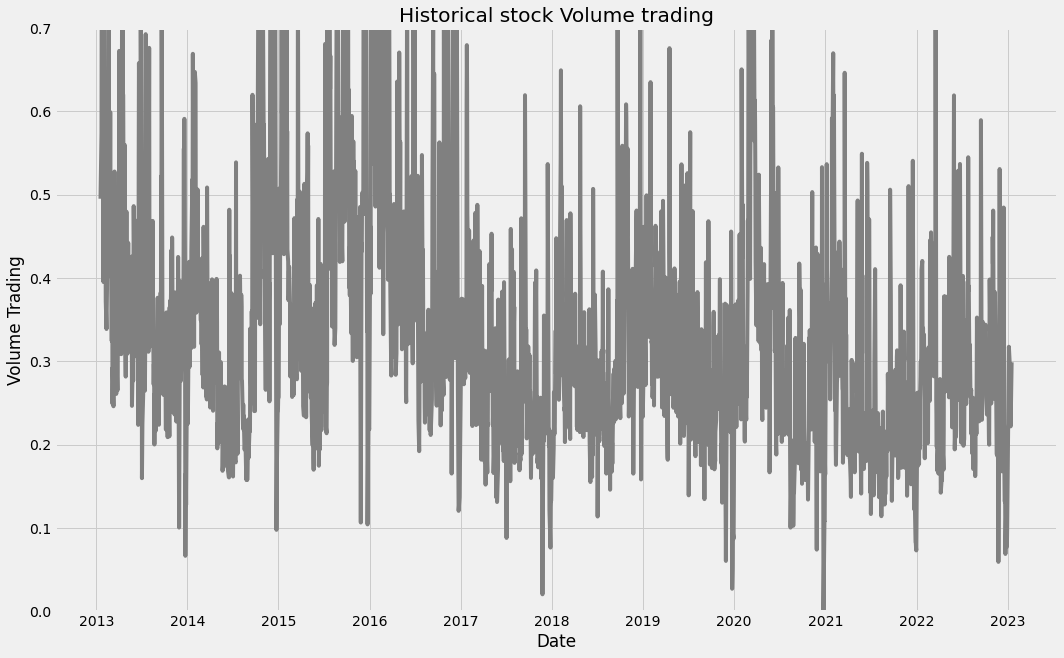

In [30]:
# Ploting Volume vs Date

fig, ax = plt.subplots(figsize=(16, 10))
ax.plot(mat_df.Volume, color='grey', linestyle= '-')
ax.set(title = "Historical stock Volume trading",
       xlabel = "Date",
       ylabel = "Volume Trading")


plt.ylim(0, 0.7)



[Text(0.5, 1.0, 'High & Low Prices of Automobile Companies'),
 Text(0.5, 0, 'Date'),
 Text(0, 0.5, 'Stock Prices')]

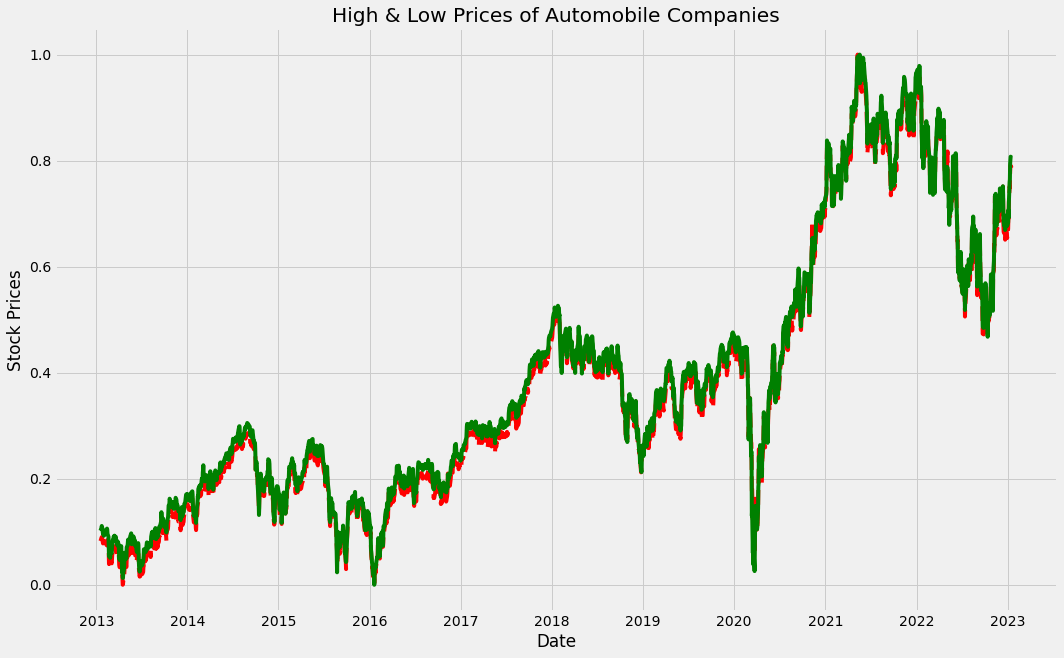

In [31]:
#Ploting High and low vs Date



fig, ax = plt.subplots(figsize=(16, 10))
ax.plot(mat_df.High, color='red', linestyle= '--')
ax.plot(mat_df.Low, color='green')
ax.set(title = "High & Low Prices of Automobile Companies",
       xlabel = "Date",
       ylabel = "Stock Prices")




In [ ]:
Multi-linear Regression Machine Learnign Model

In [34]:
# Importing machine learning model

from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [36]:
# Setting up parameters


train_df = mat_df[(mat_df.index < '2023-01-18')]
X_train = train_df[['High','Low']]
y_train = train_df['Volume']


test_df = mat_df[(mat_df.index >= '2023-01-01')]
X_test = test_df[['High', 'Low']]
y_test = test_df['Volume']

  
print("TRAIN")
print("Y train Shape: " + str(y_train.shape))
print("X train Shape: " + str(X_train.shape))

print("\nTEST")
print("Y test Shape: " + str(y_test.shape))
print("X test Shape: " + str(X_test.shape))

TRAIN
Y train Shape: (2516,)
X train Shape: (2516, 2)

TEST
Y test Shape: (10,)
X test Shape: (10, 2)


In [37]:
#Specifying machine learnig model



model = LinearRegression()



In [39]:
#Fitting model

model.fit(X_train, y_train)



LinearRegression()

In [40]:
#Checking intercept and coefficients to put in y=0.2162+4.2442X-4.3192X'

print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)



Intercept: 0.5391444334735087
Coefficients: [ 7.79273209 -8.0722896 ]


In [41]:
# Finding R score

r2 = model.score(X_train, y_train)
print("Model R2: " + str(r2))



Model R2: 0.44618118985484656


In [42]:
#Imports for visualization

import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms



In [43]:
#Printing regression results

X = sm.add_constant(X_train) # adding a constant

olsmod = sm.OLS(y_train, X).fit()
print(olsmod.summary())

                            OLS Regression Results                            
Dep. Variable:                 Volume   R-squared:                       0.446
Model:                            OLS   Adj. R-squared:                  0.446
Method:                 Least Squares   F-statistic:                     1012.
Date:                Tue, 31 Jan 2023   Prob (F-statistic):          3.46e-323
Time:                        14:59:56   Log-Likelihood:                 2083.6
No. Observations:                2516   AIC:                            -4161.
Df Residuals:                    2513   BIC:                            -4144.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5391      0.005    107.337      0.0

In [44]:
# R squared sroce. If equals 1 then perfect correlation between independent and dependent.
# If 0 no correlation.

print('R2 score:', olsmod.rsquared)



R2 score: 0.44618118985484667


In [45]:
#Printing the test scores

print("\nTEST")
print("Y test Shape: " + str(y_test.shape))
print("X test Shape: " + str(X_test.shape))




TEST
Y test Shape: (10,)
X test Shape: (10, 2)


In [46]:
# Initalizing predictions model

Predictions = model.predict(X_test)

print("prediction shape: " + str(Predictions.shape))



prediction shape: (10,)


In [47]:
# Making predications model and sorted dataframe

Pred_df=pd.DataFrame( {"Prediction": Predictions, "Actual": y_test})
Sorted_pred_df =Pred_df.sort_values(by=['Date'])
Sorted_pred_df



,Prediction,Actual
Date,,
2023-01-03,0.251690,0.219021
2023-01-04,0.229433,0.224911
2023-01-05,0.309184,0.263388
2023-01-06,0.334897,0.317522
2023-01-09,0.257706,0.299387
2023-01-10,0.206949,0.278337
2023-01-11,0.191796,0.279547
2023-01-12,0.224273,0.227354
2023-01-13,0.179379,0.221975


(0.0, 1.0)

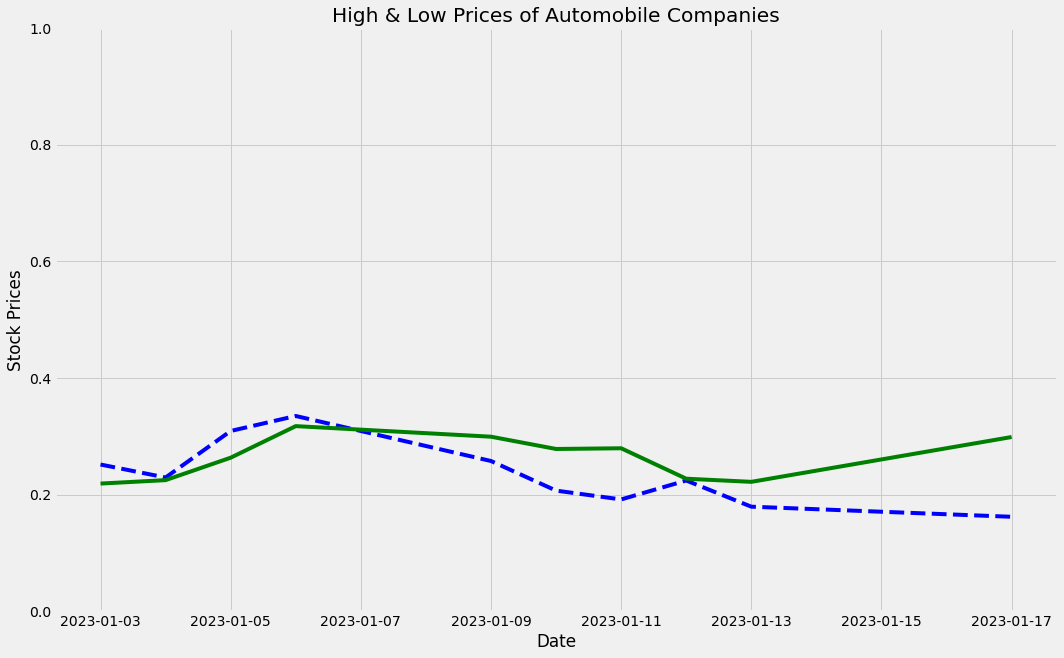

In [49]:
# Plotting predicted trend vs Actual trend

fig, ax = plt.subplots(figsize=(16, 10))
ax.plot(Sorted_pred_df.Prediction, color='blue', linestyle= '--')
ax.plot(Sorted_pred_df.Actual, color='green')
ax.set(title = "High & Low Prices of Automobile Companies",
       xlabel = "Date",
       ylabel = "Stock Prices")


plt.ylim(0, 1)



(0.0, 1.0)

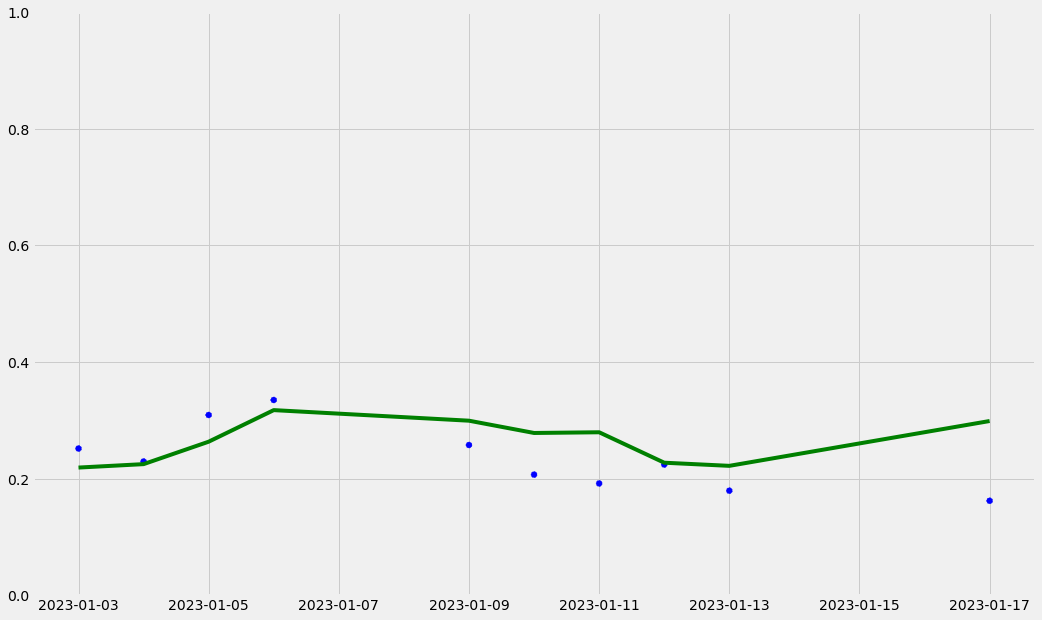

In [50]:
# Same thing as above just in a scater plot

fig, ax = plt.subplots(figsize=(16, 10))
ax.scatter(Sorted_pred_df.index,Sorted_pred_df.Prediction,color='blue', linestyle= '--')
ax.plot(Sorted_pred_df.Actual, color='green')
plt.ylim(0, 1)

